# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

# Importing and understanding Data

In [2]:
# Importing and reading the data
biking = pd.read_csv('day.csv')
biking.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Looking into the shape of df
biking.shape

(730, 16)

In [4]:
# Looking into the info of df
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking the initial generic statistics of numeric fields
biking.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking for null / missing values:
biking.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# no null values found

# Initial Data clean-up / Preparation

In [8]:
biking.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# Converting some numeric features / variables into categorical strings values
biking['weathersit'] = biking['weathersit'].map({1:'clear',2:'mist + cloudy',3:'light snow',4:'heavy snow'})
biking['season'] = biking['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
biking['mnth'] = biking['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
biking['weekday'] = biking['weekday'].map({0: 'sun',1:'mon',2:'tues',3:'wed',4:'thurs',5:'fri',6:'sat'})

In [10]:
# Dropping features / variavles / fields which are redundant or duplicates.
# Dropping dteday since we have other fields like weekday, workingday, mnth & yr
# Dropping instant since it is record index
# Dropping casual & registered since we have cnt which is the target variable and is summation of casual & registered
biking = biking.drop(['instant', 'dteday','casual', 'registered'], axis = 1)

In [11]:
# Rechecking the changes for numeric features / variables into categorical strings values and field drops
biking.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist + cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist + cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# Visualizing the data
- Part 1. Making pair plot for numeric data fields / features
- Part 2. Making box plot for non-numeric data fields / features

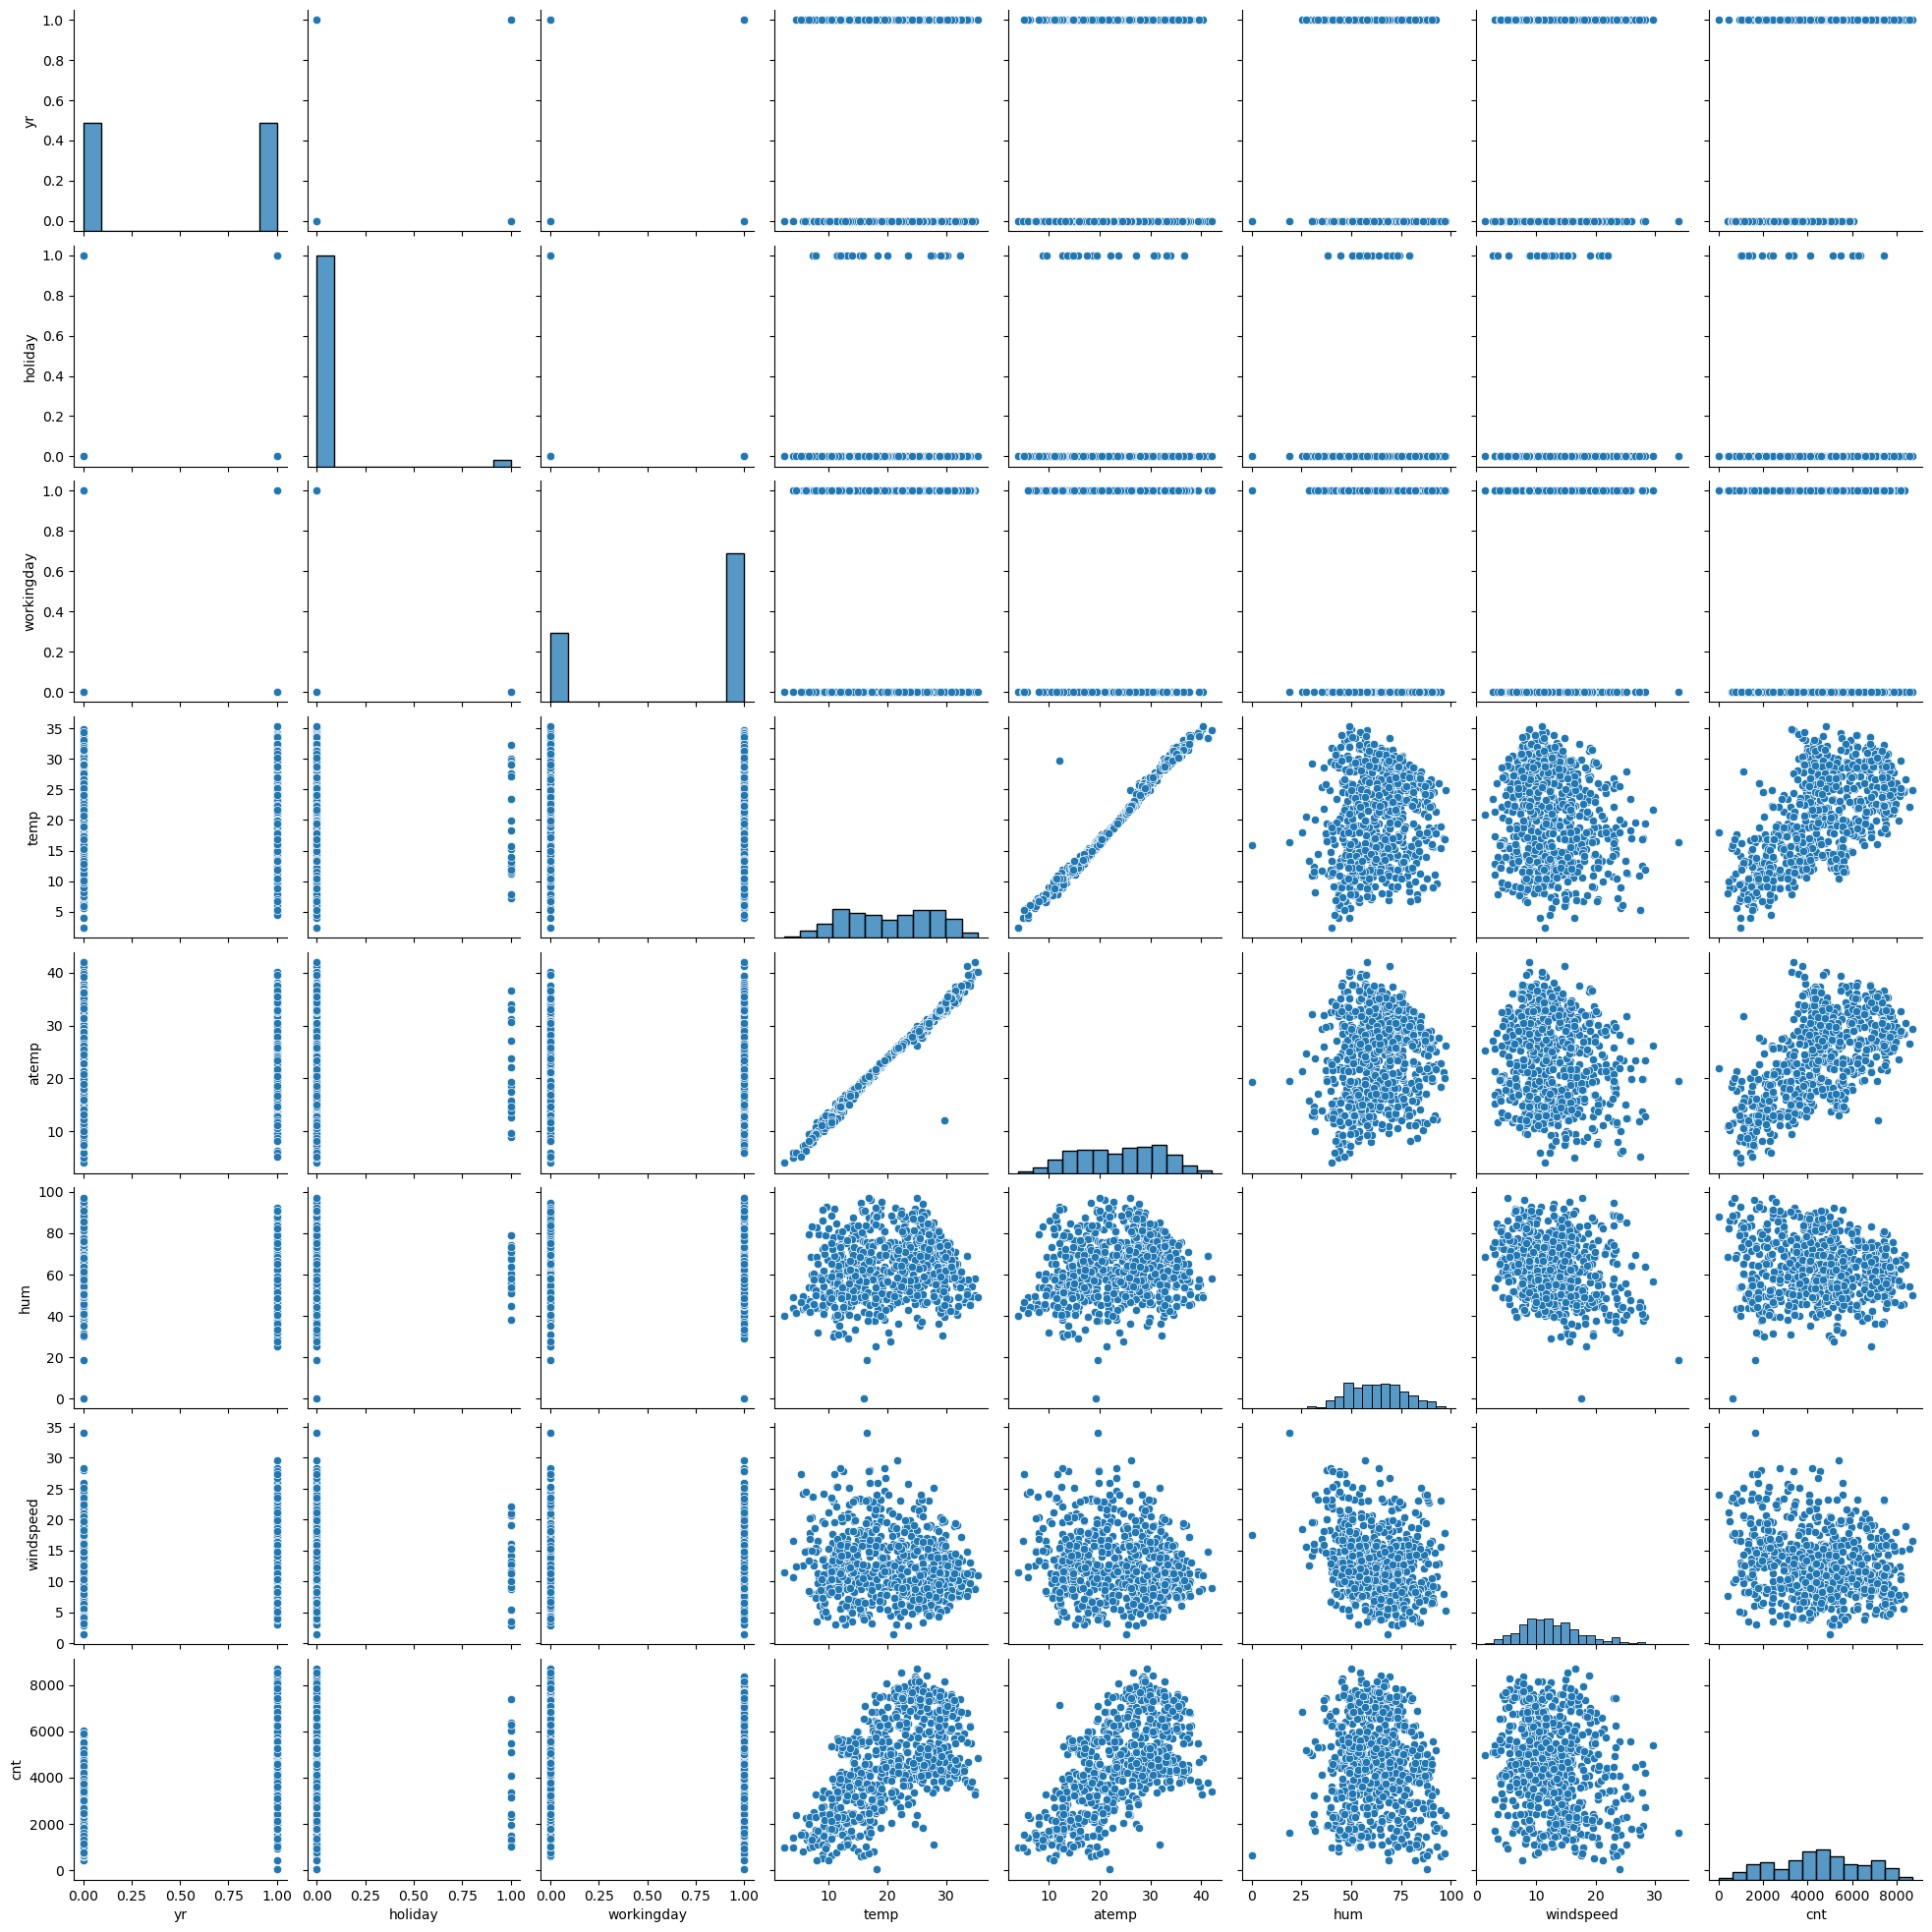

In [12]:
# Pairplot for visualizing numeric data
sns.pairplot(biking)
plt.show()

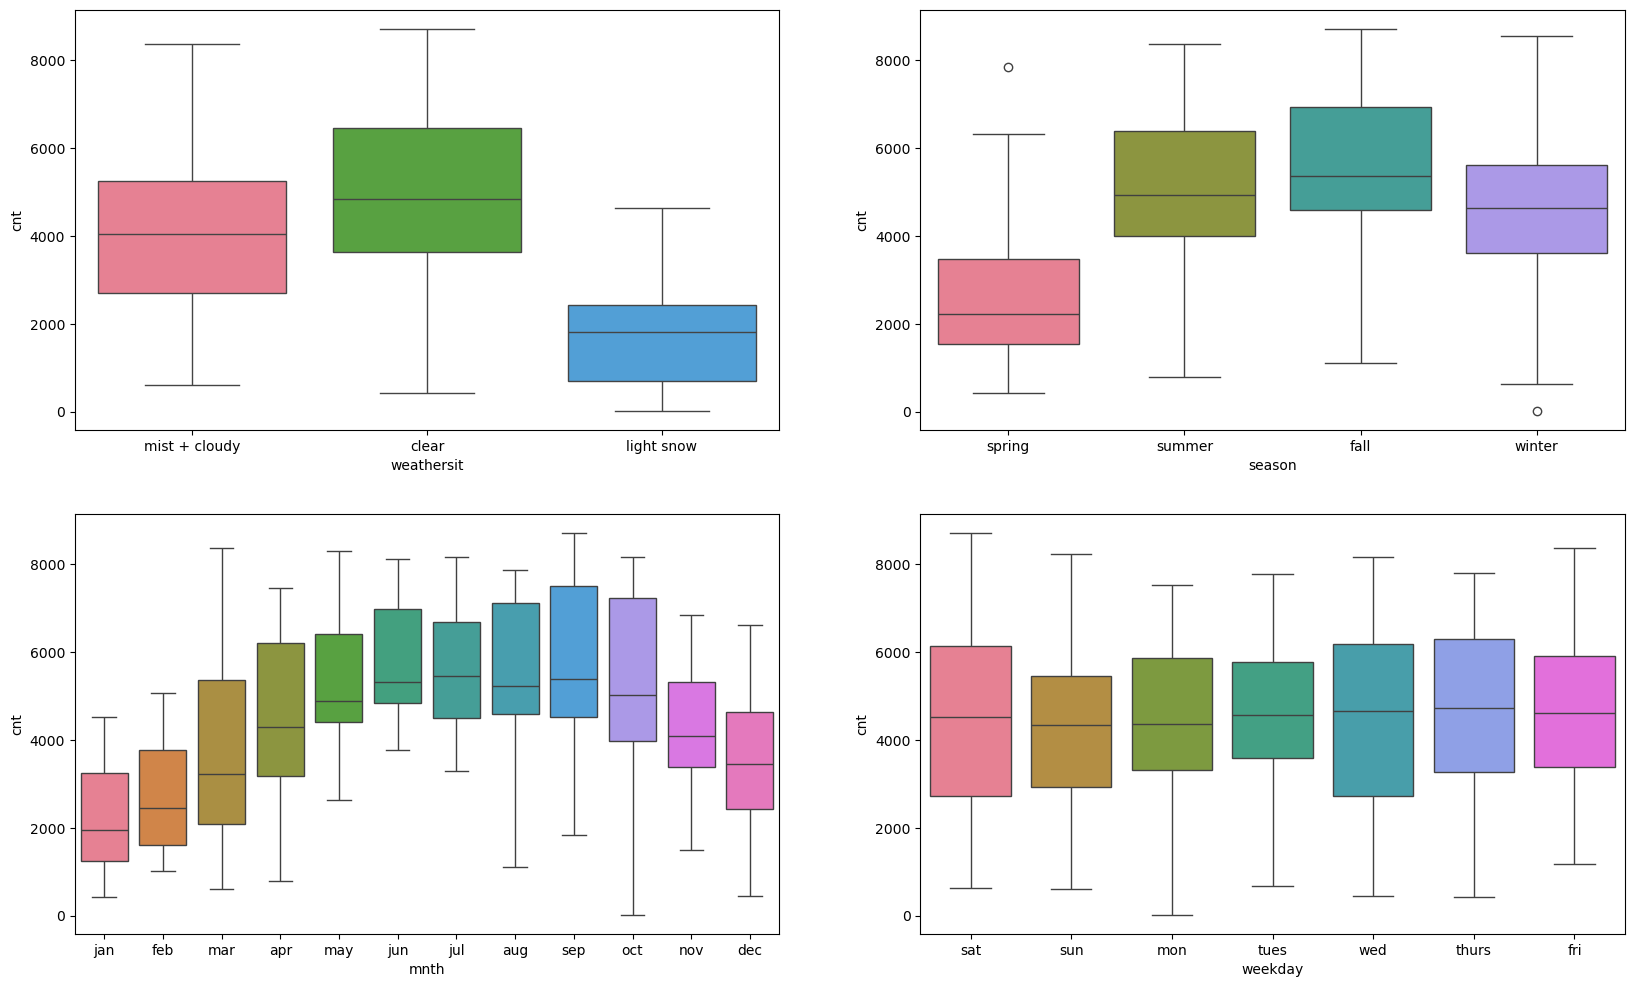

In [13]:
# Boxplot for visualizing categorical data:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = biking, palette = 'husl')
plt.subplot(2,2,2)
sns.boxplot(x = 'season', y = 'cnt', data = biking, palette = 'husl')
plt.subplot(2,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = biking, palette = 'husl')
plt.subplot(2,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = biking, palette = 'husl')
plt.show()

# Data Preparation

In [14]:
# Creating dummy variables for features having multiple levels
biking_weathersit = pd.get_dummies(biking['weathersit'],drop_first = True, dtype = int, prefix = 'weathersit')
biking_season = pd.get_dummies(biking['season'],drop_first = True, dtype = int, prefix = 'season')
biking_mnth = pd.get_dummies(biking['mnth'],drop_first = True, dtype = int, prefix = 'mnth')
biking_weekday = pd.get_dummies(biking['weekday'],drop_first = True, dtype = int, prefix = 'weekday')

In [15]:
# Incorporating / joining the dummies to main dataset
biking = pd.concat([biking,biking_weathersit,biking_season,biking_mnth,biking_weekday], axis = 1)

In [16]:
# Rechecking dataset after creating dummies and joining to main dataset
biking.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed
0,spring,0,jan,0,sat,0,mist + cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,mist + cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tues,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [17]:
# Dropping the features / field / variables for which dummies have been created
biking = biking.drop(['weathersit','season','mnth','weekday'], axis = 1)

In [18]:
# Rechecking dataset
biking.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_light snow,weathersit_mist + cloudy,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,1


# Splitting data into Training and Testing Sets

In [56]:
# creating train and test dataset so that both datasets have same rows
biking_train, biking_test = train_test_split(biking, train_size = 0.7, random_state = 100)

In [20]:
# Checking shape of train dataset (70% of biking data set - i.e. 70% * 730 = 510) 
biking_train.shape

(510, 30)

In [21]:
# Checking shape of test dataset (30% of biking data set - i.e. 70% * 730 = 220) 
biking_test.shape

(220, 30)

### Rescaling the Features

In [22]:
# Rescaling features with higher integer values to bring them into comparable scale with other features 
# else features will result into very large or very small coefficients.
scaler = MinMaxScaler()

In [23]:
# Applying scaler to features with high integer values
num_vars = ['temp','atemp','hum','windspeed']
biking_train[num_vars] = scaler.fit_transform(biking_train[num_vars])

In [24]:
# Checking biking_train dataset after scaling
biking_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_light snow,weathersit_mist + cloudy,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1683,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Checking the initial generic statistics of biking_train dataset post scaling
biking_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_light snow,weathersit_mist + cloudy,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,4485.337255,0.029412,0.345098,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,1950.666077,0.169124,0.475867,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


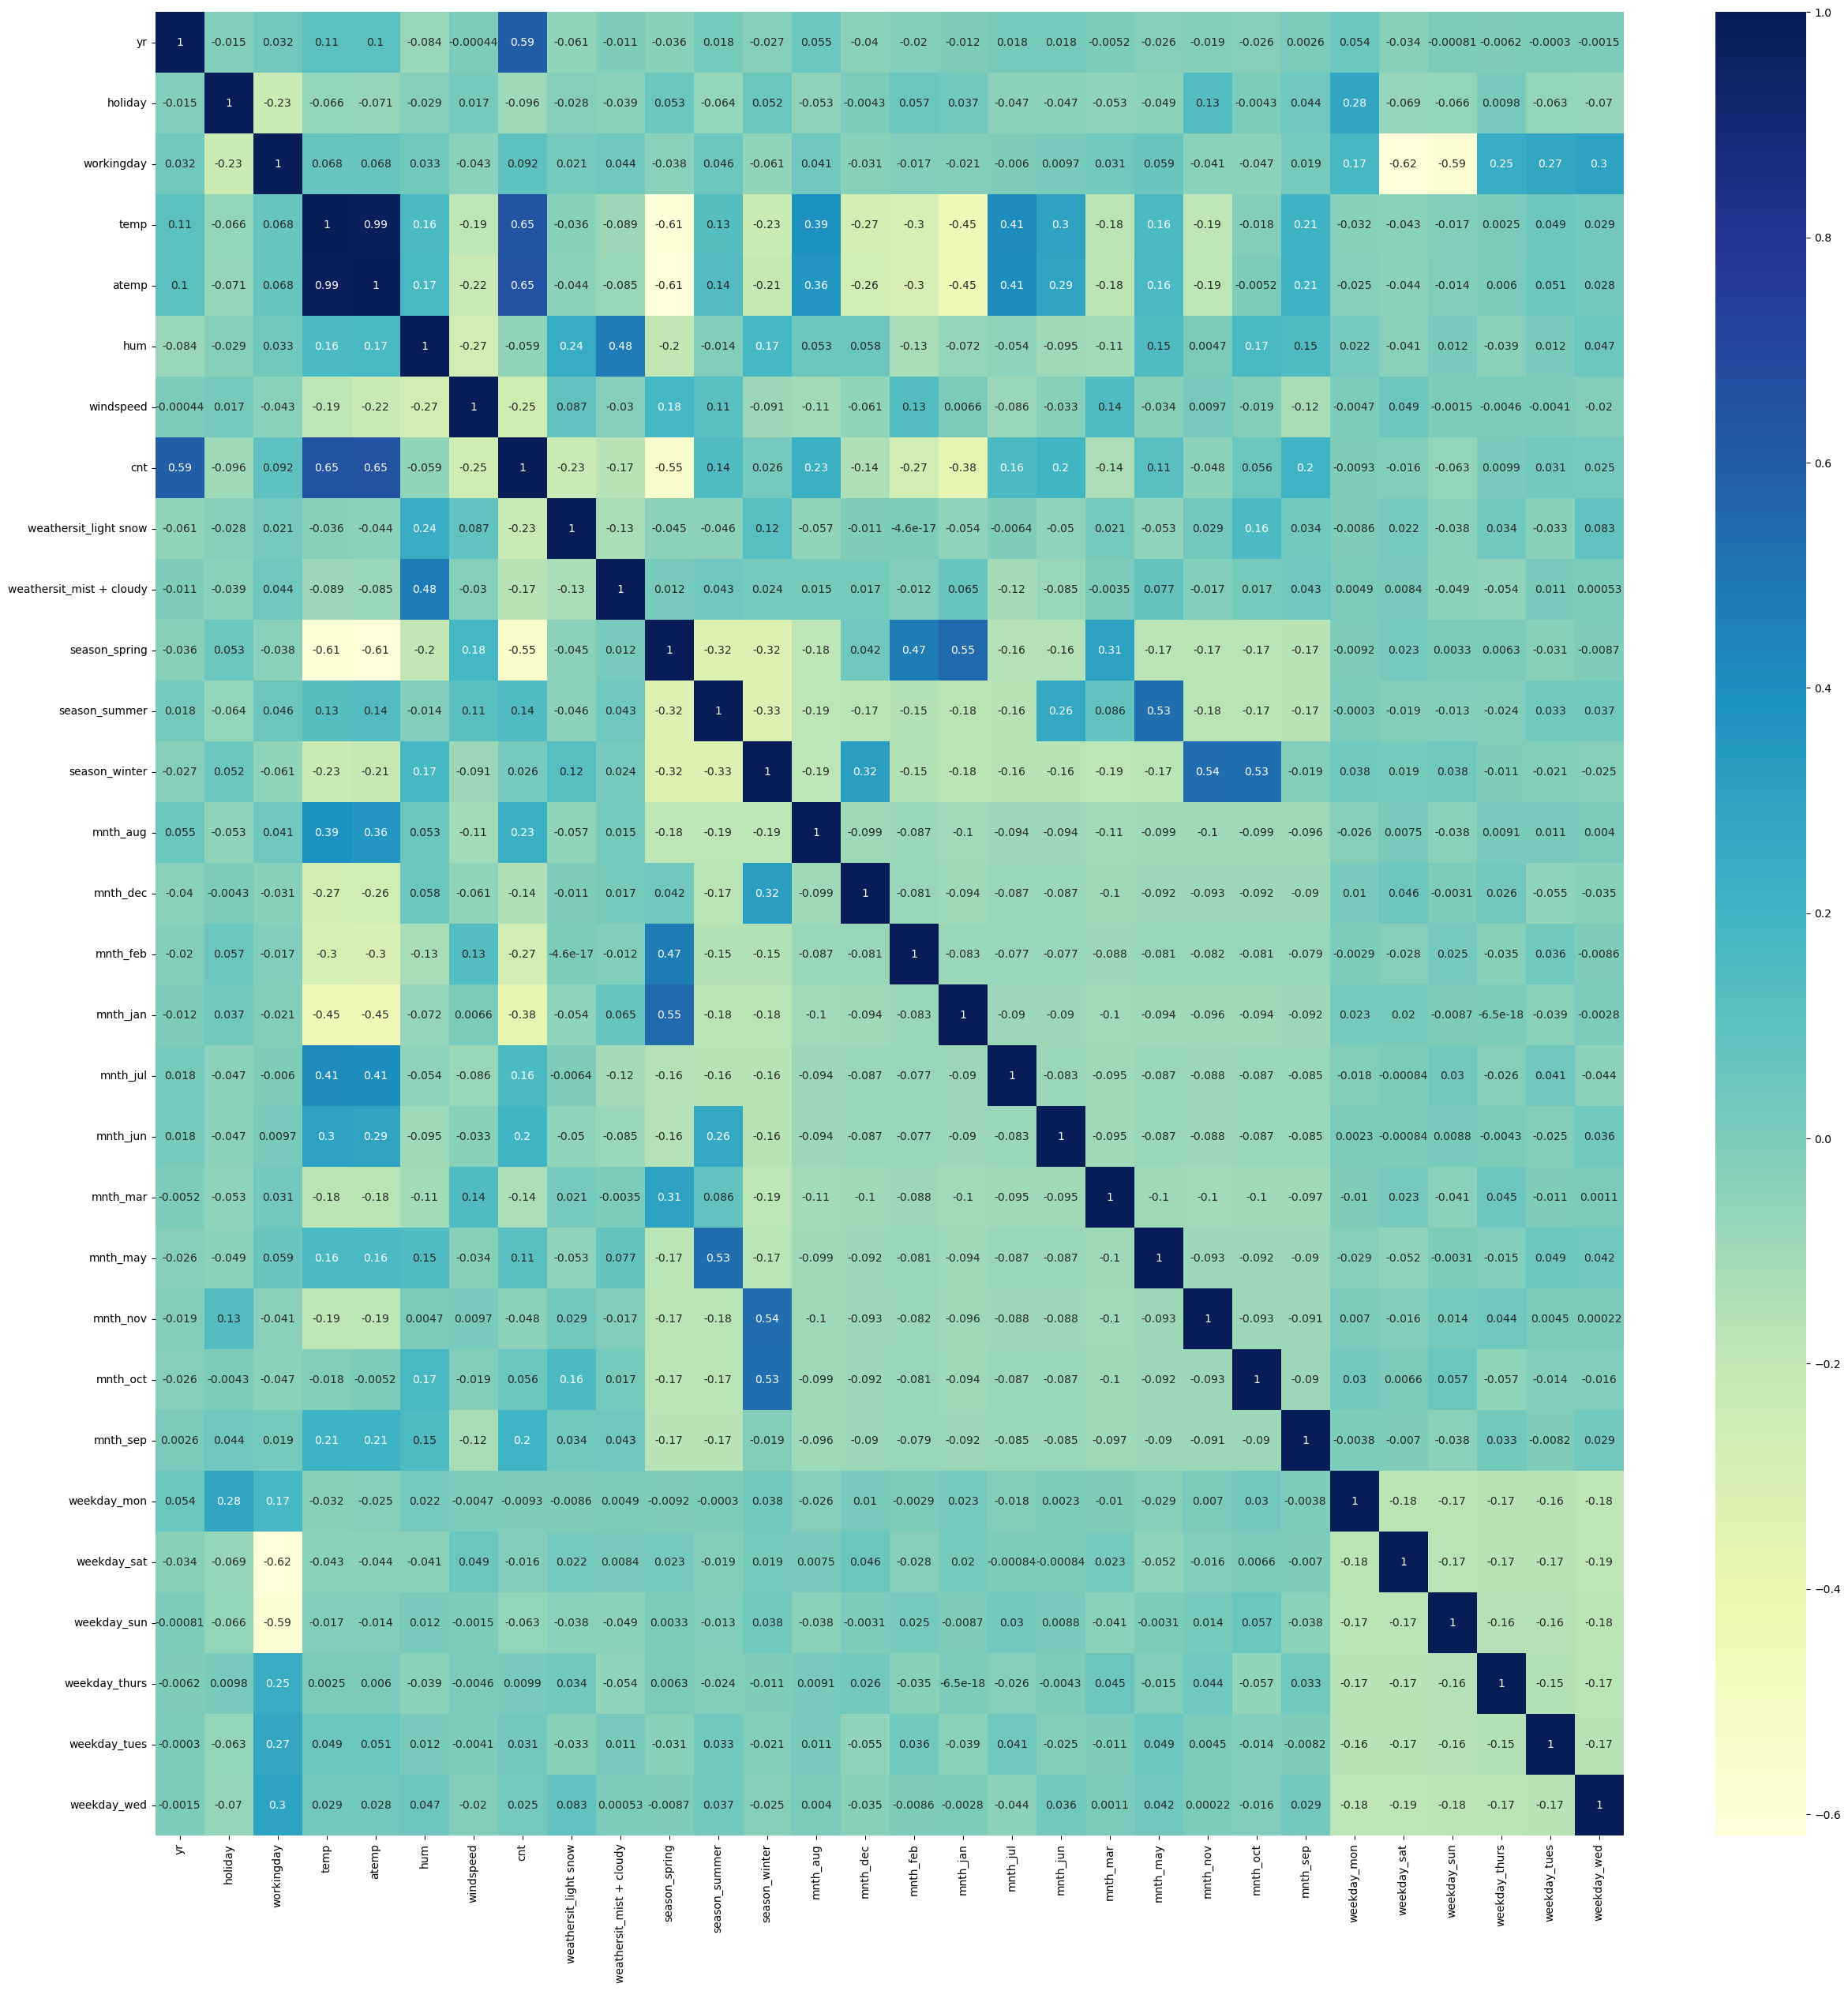

In [26]:
# Checking correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30,30))
sns.heatmap(biking_train.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

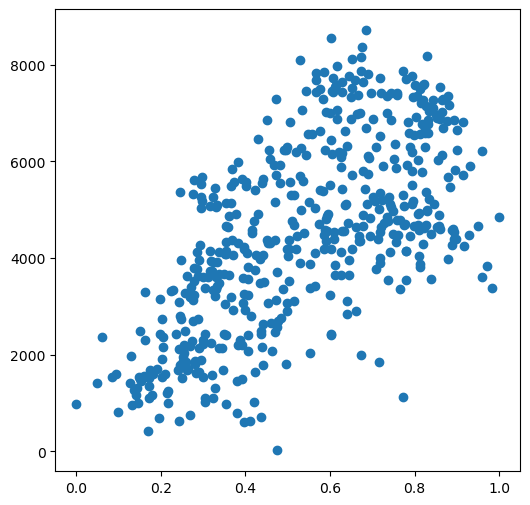

In [27]:
plt.figure(figsize=[6,6])
plt.scatter(biking_train.temp, biking_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [28]:
y_train = biking_train.pop('cnt')
X_train = biking_train

# Building the model
- We are using mixed approach [starts with automated modelling (RFE) followed by manual course correction (Statsmodels)] of modelling

### Automated modelling using RFE

In [29]:
# Running the RFE with the output number of variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 14),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_light snow', True, 1),
 ('weathersit_mist + cloudy', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 10),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thurs', False, 11),
 ('weekday_tues', False, 8),
 ('weekday_wed', False, 13)]

In [31]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'weathersit_light snow', 'weathersit_mist + cloudy', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sep',
       'weekday_sat'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thurs', 'weekday_tues', 'weekday_wed'],
      dtype='object')

### Refining model using the Statsmodels, for the detailed statistics

In [33]:
# Creating function for calculating VIF
def new_vif(df_1):
    vif = pd.DataFrame()
    vif['Features'] = df_1.columns
    vif['VIF'] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [34]:
X_train_new = X_train[col]

In [35]:
X_train_lmd = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lmd).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          4.22e-191
Time:                        09:22:24   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [36]:
new_vif(X_train_new)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
8,season_spring,4.53
10,season_winter,3.46
9,season_summer,2.85
7,weathersit_mist + cloudy,2.29
0,yr,2.09
14,weekday_sat,1.98


### Dropping the variables / features based on p-values and VIF and updating the model

In [37]:
# Dropping variable mnth_jan since it has high p-value:
X_train_new = X_train_new.drop(['mnth_jan'], axis = 1)
X_train_lmd_1 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lmd_1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        09:22:24   Log-Likelihood:                -4108.2
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8310.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [38]:
new_vif(X_train_new)

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
8,season_spring,4.24
10,season_winter,3.42
9,season_summer,2.85
7,weathersit_mist + cloudy,2.29
0,yr,2.08
13,weekday_sat,1.97


In [39]:
# Dropping variable holiday since it has high p-value:
X_train_new = X_train_new.drop(['holiday'], axis = 1)
X_train_lmd_2 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lmd_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          1.54e-191
Time:                        09:22:24   Log-Likelihood:                -4110.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     496   BIC:                             8309.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [40]:
new_vif(X_train_new)

,Features,VIF
3,hum,28.38
2,temp,16.88
1,workingday,4.72
4,windspeed,4.70
7,season_spring,4.18
9,season_winter,3.39
8,season_summer,2.84
6,weathersit_mist + cloudy,2.28
0,yr,2.08
12,weekday_sat,1.84


In [41]:
# Dropping variable hum (humidity) since it has high VIF:
X_train_new = X_train_new.drop(['hum'], axis = 1)
X_train_lmd_3 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lmd_3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          7.12e-189
Time:                        09:22:24   Log-Likelihood:                -4119.8
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     497   BIC:                             8321.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [42]:
new_vif(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
6,season_spring,2.38
7,season_summer,2.32
0,yr,2.07
8,season_winter,1.91
11,weekday_sat,1.83
9,mnth_jul,1.58
5,weathersit_mist + cloudy,1.57


In [43]:
# Dropping variable mnth_jul with p-value 0f 0.009 :
X_train_new = X_train_new.drop(['mnth_jul'], axis = 1)
X_train_lmd_4 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lmd_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          1.42e-188
Time:                        09:22:24   Log-Likelihood:                -4123.3
No. Observations:                 510   AIC:                             8271.
Df Residuals:                     498   BIC:                             8321.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [44]:
new_vif(X_train_new)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
6,season_spring,2.30
0,yr,2.07
7,season_summer,2.00
10,weekday_sat,1.83
8,season_winter,1.76
5,weathersit_mist + cloudy,1.57
9,mnth_sep,1.23


In [45]:
# Dropping variable season_spring with p-value of 0.007:
X_train_new = X_train_new.drop(['season_spring'], axis = 1)
X_train_lmd_5 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lmd_5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          3.13e-188
Time:                        09:22:24   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     499   BIC:                             8323.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [46]:
new_vif(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
9,weekday_sat,1.69
6,season_summer,1.57
5,weathersit_mist + cloudy,1.53
7,season_winter,1.40
8,mnth_sep,1.20
4,weathersit_light snow,1.08


### Performing Residual Analysis of the train data

In [47]:
y_train_cnt = lm.predict(X_train_lmd_5)

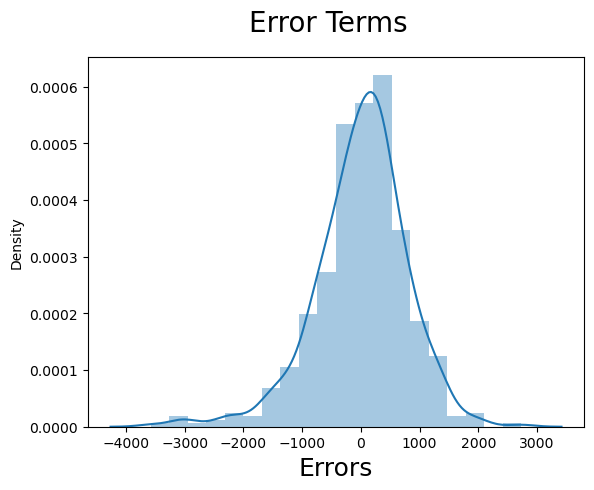

In [48]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Making Predictions on test data set

In [49]:
# Applying scaler to features in test dataset with high integer values
biking_test[num_vars] = scaler.transform(biking_test[num_vars])

In [50]:
biking_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_light snow,weathersit_mist + cloudy,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,4560.559091,0.027273,0.318182,...,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,1904.968544,0.163248,0.466833,...,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,5913.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [51]:
y_test = biking_test.pop('cnt')
X_test = biking_test

In [52]:
# Using train model to make prediction on test dataset
# Creating X_test_new df by dropping variables from X_test in conjuction with X_train_new
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [53]:
# Making prediction
y_test_pred = lm.predict(X_test_new)

# Model Evaluation

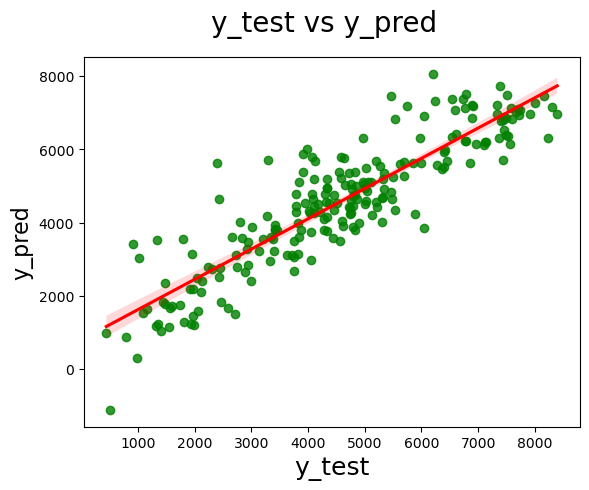

In [54]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
sns.regplot(x = y_test,y = y_test_pred, scatter_kws={"color": "green"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [55]:
# Computing R Squared (r2)
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7961390438459766

# Conclusions:

 - Final Train model r2 = 83.5%
 - Final Test model r2 = 79.61%
 - Since the variance between train and test model is not very significant and also the y_test & y_pred regplot provides a good linear regression, the above derived model looks ok.

### - Significant Variables in predicting the demand for shared bikes and how well these variables describe the bike demands are as below:
 - Temperature: temp has the highed coefficient and thus, it means that a unit increase in temp, demand for shared bikes increases by it's coefficient.
 - Year 2019: There is YoY growth
 - Season (Summer & Winter): Demand for shared bike increases in Summer and Winter season where winter has the higher coefficient.
 - Year: September month sees highest demand in all the months.
 - Weekday: In all days of the week, Saturday has the highest demand for shared bikes.
 - Working days
 - Weathersit: Weather - Mist & Cloudy and Light Snow, have adverse impact on the shared bike demand. Both have negative coefficients with light snow weather has higher negative coefficient.
 - Windspeed: This variable too indicates adverse impact on shared bike demand with negative coefficient.